In [2]:
import numpy as np
import matplotlib.pyplot as plt
from os import path, listdir
from os.path import join

from plot_props import PlotProps
from mpl_toolkits.mplot3d import Axes3D

In [3]:
pp = PlotProps()

In [4]:
source = join('neural_timing', 'results', 'tonic')
dest = join('neural_timing', 'figures')

In [5]:
a = 1

source_nf = join(source, 'noisefree')

tr_time = np.loadtxt(join(source, 'ts_set'))
time_file = [int(t*1000) for t in tr_time]

cntxt_in_high = np.loadtxt(join(source_nf, 'context_inputs_high_a_%d'%a))
cntxt_in_low = np.loadtxt(join(source_nf, 'context_inputs_low_a_%d'%a))
set_in = np.loadtxt(join(source_nf, 'set_inputs_a_%d'%a))
targ_high = np.loadtxt(join(source_nf, 'target_outputs_high_a_%d'%a))
targ_low = np.loadtxt(join(source_nf, 'target_outputs_low_a_%d'%a))

files_high = [join(source_nf, 'zs_high_ts_%d_a_%d'%(t, a)) 
              for t in time_file]
files_low = [join(source_nf, 'zs_low_ts_%d_a_%d'%(t, a)) 
             for t in time_file]

zs_high = []
zs_low = []
for fh, fl in zip(files_high, files_low):
    zs_high.append(np.loadtxt(fh))
    zs_low.append(np.loadtxt(fl))

zs_high = np.array(zs_high).squeeze().T
zs_low = np.array(zs_low).squeeze().T

In [120]:
np.where(set_in[:, 0])

(array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
        113, 114, 115, 116, 117, 118, 119, 120, 200, 201, 202, 203, 204,
        205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217,
        218, 219]),)

## Plot 1

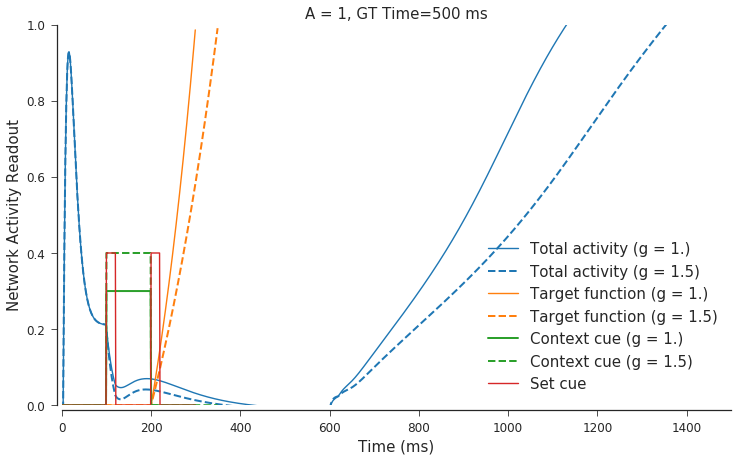

In [121]:
inds1 = targ_low[:, 0]<1.
inds2 = targ_high[:, 0]<1.
tot_tup = (1, 1)

pp.init_figure(figsize=(12, 7), wspace=.5)
ax1 = pp.init_subplot(title = 'A = %d, GT Time=%d ms'%(a, 500), 
                      tot_tup=tot_tup, sp_tup=(0, 0),
                      xlabel='Time (ms)',
                      ylabel='Network Activity Readout',
                      despine=True, offset=5)
ax1.plot(zs_low[:, 8], label='Total activity (g = 1.)', color=pp.colors[0])
ax1.plot(zs_high[:, 8], '--', label='Total activity (g = 1.5)', color=pp.colors[0], linewidth=2.)
ax1.plot(targ_low[:, 0][inds1], label='Target function (g = 1.)', color=pp.colors[1])
ax1.plot(targ_high[:, 0][inds2], '--', label='Target function (g = 1.5)', color=pp.colors[1], linewidth=2.)
ax1.plot(cntxt_in_low[:, 0][inds1], label='Context cue (g = 1.)', color=pp.colors[2], linewidth=2.)
ax1.plot(cntxt_in_high[:, 0][inds2], '--', label='Context cue (g = 1.5)', color=pp.colors[2], linewidth=2.)
ax1.plot(set_in[:, 0][inds1], label='Set cue', color=pp.colors[3])
plt.ylim([0, 1])
plt.xlim([0, 1500])
pp.legend(loc='lower right')

# fig_f = plt.gcf()
# fig_f.savefig(join(dest, 'Fig0-RNNFit-NoiseFree.pdf'))

plt.show()

In [6]:
inds = np.array([np.nonzero(sin)[0][-1] for sin in set_in.T])
A = np.arange(1., 6.)


low_time_est = []
high_time_est = []
for a in A:
    files_high = [join(source_nf, 'zs_high_ts_%d_a_%d'%(t, int(a))) 
                  for t in time_file]
    files_low = [join(source_nf, 'zs_low_ts_%d_a_%d'%(t, int(a))) 
                 for t in time_file]

    zs_high = []
    zs_low = []
    for fh, fl in zip(files_high, files_low):
        zs_high.append(np.loadtxt(fh))
        zs_low.append(np.loadtxt(fl))

    zs_high = np.array(zs_high).squeeze().T
    zs_low = np.array(zs_low).squeeze().T
    
    low_time_est.append(np.array([np.where(zs<=1.)[0][-1] - ind 
                        for zs, ind in zip(zs_low.T, inds)]))
    high_time_est.append(np.array([np.where(zs<=1.)[0][-1] - ind 
                         for zs, ind in zip(zs_high.T, inds)]))
    

In [123]:
set_in.shape

(3300, 41)

In [43]:
print(high_time_est[0][0].shape, len(time_file))

() 41


## Plot 2

In [75]:
pp.init_figure(figsize=(15, 7), wspace=.5)
tot_tup = (1, 2)
pp.init_subplot(title='Gain=1.',
                tot_tup=tot_tup,
                xlabel='Groundtruth time (ms)', 
                ylabel='RNN est. time (ms)',
                despine=True,
                offset=5)
for i, lte in enumerate(low_time_est):    
    plt.plot(tr_time*1000, lte, label='A=%d'%A[i], color=pp.colors[i])
plt.plot(tr_time*1000, tr_time*1000, 'k--', label='y = x', linewidth=2.)
pp.legend()

pp.init_subplot(title='Gain=1.5',
                tot_tup=tot_tup,
                sp_tup=(0, 1),
                xlabel='Groundtruth time (ms)', 
                ylabel='RNN est. time (ms)',
                despine=True,
                offset=5)
for i, hte in enumerate(high_time_est):    
    plt.plot(tr_time*1000, hte, label='A=%d'%A[i], color=pp.colors[i])
plt.plot(tr_time*1000, tr_time*1500, 'k--', label='y = 1.5x', linewidth=2.)
pp.legend()
# fig_f = plt.gcf()
# fig_f.savefig(join(dest, 'Fig1-RNNvsGTEst-Noisefree.pdf'))

plt.show()
# plt.scatter(tr_time, high_time_est, label='Gain = 1.5')

## Plot 3

No handles with labels found to put in legend.


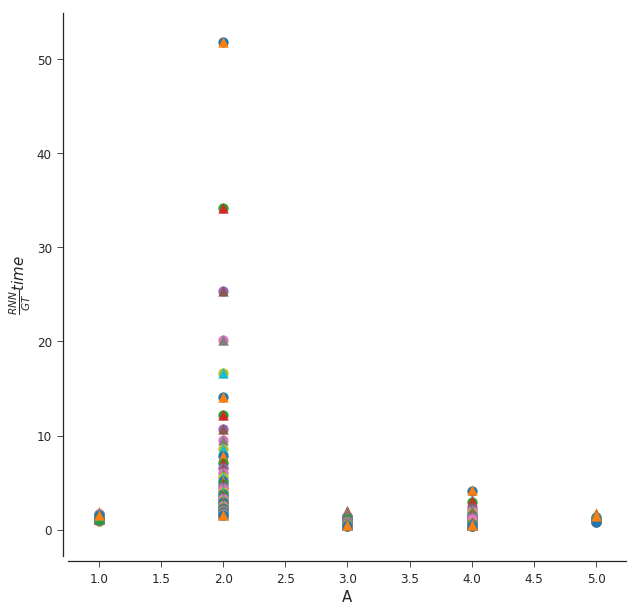

In [152]:
A = np.arange(1., 6.)
pp.init_figure(figsize=(10, 10))
pp.init_subplot(title='', 
                xlabel='A', 
                ylabel=r'$\frac{RNN}{GT} time$',
                despine=True,
                offset=5)
low_time_est = np.array(low_time_est)
high_time_est = np.array(high_time_est)
for i, t in enumerate(tr_time):
    plt.scatter(A, low_time_est[:, i]/(t*1000), s=100, marker='o')
    plt.scatter(A, high_time_est[:, i]/(t*1000), s=100, marker='^')
pp.legend()

# fig_f = plt.gcf()
# fig_f.savefig(join(dest, 'Fig2-RNNvsA-NoiseFree.pdf'))

plt.show()

## Plot 4

In [120]:
def stack():
    xs_high = np.zeros([1, 200])
    xs_low = np.zeros([1, 200])
    for i, t in enumerate(time_file):
        for a in A[:1]:
            ind = np.where(set_in[:, i]>0.)[0][-1] + 100
            end_ind = np.where(zs_low[:, i]<1.)[0][-1]
            load_high = np.loadtxt(join(source_nf, 
                                        'xs_high_ts_%d_a_%d'%(t, int(a)))
                                   )[ind:end_ind]
            load_low = np.loadtxt(join(source_nf, 
                                        'xs_low_ts_%d_a_%d'%(t, int(a)))
                                   )[ind:end_ind]
            xs_high = np.vstack([xs_high, load_high])
            xs_low = np.vstack([xs_low, 
                                load_low
                              ])
            
    return xs_high[1:, :], xs_low[1:, :]

def destack(t, a, string='high', end_ind=1500):
    i = np.argwhere(np.array(time_file)==t)
    ind = np.where(cntxt_in_high[:, i]>0.)[0][-1]
#     ind = ind[-1] + 100
    if end_ind is None:
        end_ind = np.where(zs_low[:, i]<1.)[0][-1]
    mat = np.loadtxt(join(source_nf, 'xs_%s_ts_%d_a_%d'%(string, t, int(a))))
    return mat[ind:end_ind, :]

In [121]:
xs_high, xs_low = stack()

In [122]:
xs = np.vstack([xs_high, xs_low])

In [37]:
xs.shape

(75632, 200)

In [83]:
mean = xs.mean(axis=0)
xs_cent = xs - mean
cov = xs_cent.T.dot(xs_cent)

In [84]:
eig, vec = np.linalg.eig(cov)
inds = np.argsort(eig)[::-1]
eig_sort = eig[inds]
vec_sort = vec[:, inds]

In [87]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

from matplotlib import cm
import seaborn as sns
p = np.linspace(.1, .7, 7)
plt.ion()
for i, t in enumerate(time_file[-1:]):
    lab1 = ''
    lab2 = ''
    if i == 0:
        lab1 = 'Gain = 1.5'
        lab2 = 'Gain = 1.'
    xs_proj_h = destack(t=t, a=a, string='high')
    xs_proj_l = destack(t=t, a=a, string='low')

#     plt.plot(xs_proj[:, 0])
    xs_proj_h = xs_proj_h.T - xs_proj_h.mean(axis=1)
    xs_proj_l = xs_proj_l.T - xs_proj_l.mean(axis=1)

    proj_h = xs_proj_h.T.dot(vec_sort)
    proj_l = xs_proj_l.T.dot(vec_sort)
    cut = 500
    ax.scatter(proj_h[cut:, 3], proj_h[cut:, 1], proj_h[cut:, 2], color=cm.hot(p[i]), label=lab1)
    ax.scatter(proj_l[cut:, 3], proj_l[cut:, 1], proj_l[cut:, 2], color=cm.cool(p[i]), label=lab2)
#     plt.plot(proj_l[:, 0], proj_l[:, 1], color=cm.cool(p[i]), label=lab2)
#     plt.plot(proj_h[:, 0], proj_h[:, 1], color=cm.hot(p[i]), label=lab1)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
ax.legend()
# Hide grid lines
ax.grid(False)

# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

sns.despine(ax=ax, offset=5)
#     plt.plot(proj[:, 0])
#     plt.plot(proj[:, 1])
#     plt.plot(proj[:, 2])
plt.show()

AttributeError: 'YAxis' object has no attribute 'tick_left'

## Logistic Regression

In [117]:
import sklearn.linear_model

lr = sklearn.linear_model.LogisticRegression()
y  = np.vstack([np.ones(len(xs_high)),
                np.zeros(len(xs_low))
               ]).flatten()

lr_fit = lr.fit(X=xs, y=y)

## Projecting into the scaling subspace

## Plot 5

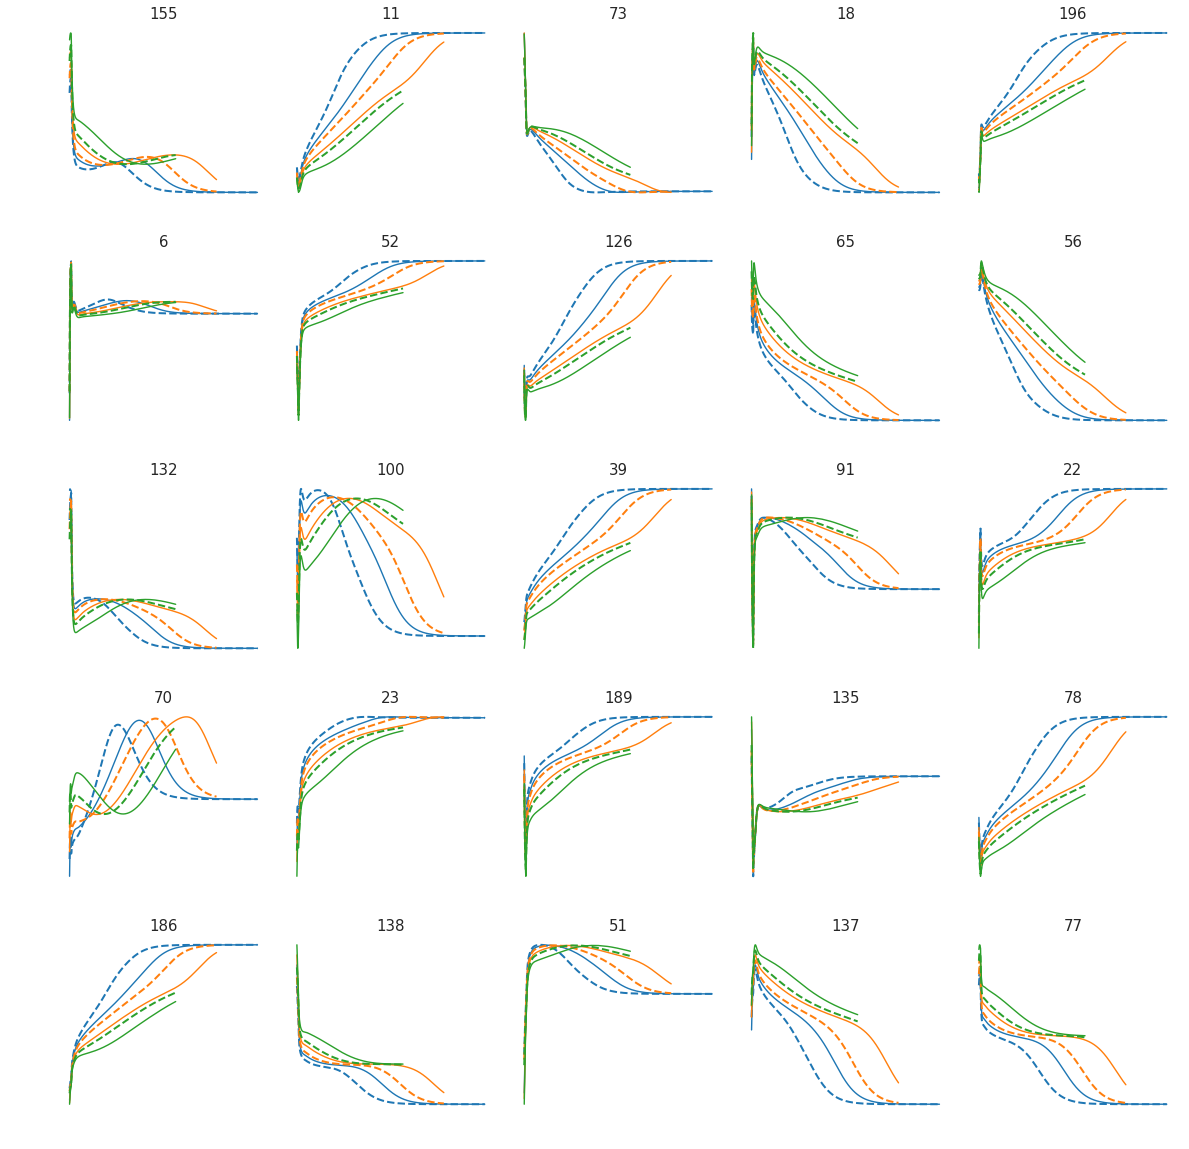

In [114]:
%matplotlib inline
plt.ioff()
a = 1.
fig = pp.init_figure(figsize=(20, 20))
tot_tup = (5, 5)
for j, n in enumerate(np.random.choice(range(200), size=25, replace=False)):
    ax = pp.init_subplot(title='%d'%(n+1),
                         tot_tup=tot_tup,
                         sp_tup=(int(j/5), j%5),
                         xlabel='',
                         ylabel='',
                         despine=True,
                         offset=5)
    sns.despine(ax=ax, bottom=True, left=True)
    plt.axis('off')
    for i, t in enumerate([time_file[10], time_file[20], time_file[30]]):
        lab1 = ''
        lab2 = ''
        if i == 0:
            lab1 = 'Gain = 1.5'
            lab2 = 'Gain = 1.'
        xs_h = destack(t=t, a=a, string='high', end_ind=3000)
        xs_l = destack(t=t, a=a, string='low', end_ind=3000)

        ax.plot((xs_h[:, n]), label='GT Time=%d'%t, color=pp.colors[i])
        ax.plot((xs_l[:, n]), '--', color=pp.colors[i], linewidth=2.)
        
#     ax.legend()

fig_f = plt.gcf()
fig_f.savefig(join(dest, 'Fig5a-AllNeuronTraj-Noisefree.pdf'))
plt.show()

## Traj for 1 neuron

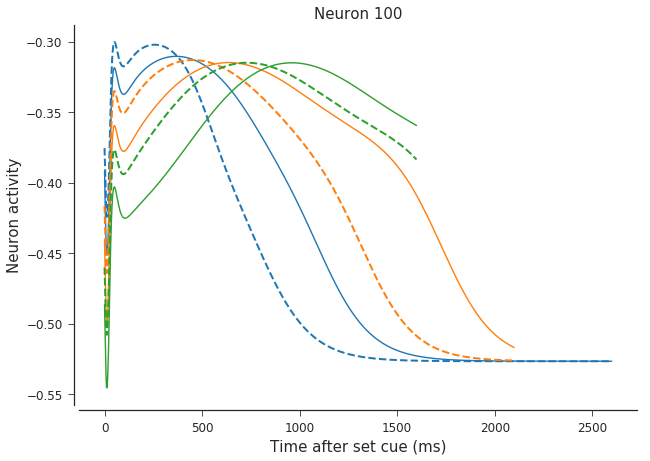

In [116]:
a = 1.
fig = pp.init_figure(figsize=(10, 7))
tot_tup = (1, 1)
for j, n in enumerate([99]):
    ax = pp.init_subplot(title='Neuron %d'%(n+1),
                         tot_tup=tot_tup,
                         sp_tup=(int(j/5), j%5),
                         xlabel='Time after set cue (ms)',
                         ylabel='Neuron activity',
                         despine=True,
                         offset=5)
    
    for i, t in enumerate([time_file[10], time_file[20], time_file[30]]):
        lab1 = ''
        lab2 = ''
        if i == 0:
            lab1 = 'Gain = 1.5'
            lab2 = 'Gain = 1.'
        xs_h = destack(t=t, a=a, string='high', end_ind=3300)
        xs_l = destack(t=t, a=a, string='low', end_ind=3300)

        ax.plot((xs_h[:, n]), label='GT Time=%d'%t, color=pp.colors[i])
        ax.plot((xs_l[:, n]), '--', color=pp.colors[i], linewidth=2.)
        
#     ax.legend()

# fig_f = plt.gcf()
# fig_f.savefig(join(dest, 'Fig5-NeuronTraj-Noisefree.pdf'))
plt.show()

## Eigenvalue calculation for linearized dynamical eqn

In [63]:
params = np.loadtxt(join(source, 'prms_a_1'))

In [64]:
xo = params[:, 0]
wo = params[:, 1]
Bc = params[:, 2]
Bs = params[:, 3]
J = params[:, 4:-2]
cx = params[:, -2]
cz = params[:, -1][0]

In [65]:
eig, vec = np.linalg.eig(J - np.eye(J.shape[0]))

In [66]:
plt.plot(np.real(eig), np.imag(eig), 'o')
plt.zeroline()

AttributeError: module 'matplotlib.pyplot' has no attribute 'zeroline'

In [67]:
x = destack(t=500, a=1, string='high')

In [68]:
xl = np.array([x[-1]])
xl.shape

(1, 200)

In [69]:
J_f = J*(1 - np.tanh(xl.T)**2)
J_rand = np.random.normal(scale=(1./200), size=[200, 200])

In [70]:
eig, vecs = np.linalg.eig(J_f - np.eye(len(J_f)))
eig_r, vec_r = np.linalg.eig(J)

In [72]:
pp.init_figure(figsize=(10, 7))
ax = pp.init_subplot(title='',
                     despine=True,
                     offset=10
                    )
plt.scatter(np.real(eig_r), np.imag(eig_r), s=100, label='Initial')
plt.scatter(np.real(eig), np.imag(eig), s=100, label='Final')
x = np.linspace(0., 2*np.pi, 100)
plt.plot(np.cos(x), np.sin(x), 'k', linewidth=2., label='Unit circle')
plt.axhline(0., color='k', linewidth=2.)
plt.axvline(0., color='k', linewidth=2.)
pp.legend()

# fig_f = plt.gcf()
# fig_f.savefig(join(dest, 'Fig6-EigVal-NoiseFree.pdf'))